# Distribución de la Media Muestral.

Algunas variables aleatorias tienen como atributo el ser independientes e identicamente distribuidas. Esto se abrevia con las siglas <i>i.i.d</i>:

En esos casos se habla de independencia, en el sentido de que la probabilidad de un evento cualquiera no afecta o altera la probabilidad de ocurrencia de los resultados subsiguientes.

La parte referida a estar identicamente distribuidos, significa, simplemente, que todos los eventos u ocurrencias proceden de una misma distribución de probabilidad.

Al lanzar una moneda, por ejemplo, la probabilidad de obtener cara o sello es 0.5, para ambos resultados, lanzamiento tras lanzamiento. 

Por otra parte, cada observación es aleatorimente extraída de la misma población, esto es:$X(cara)=0$ y $X(sello)=1$, ambos resultados tienen la misma distribución de probabilidad.

El caso del lanzamiento de un dado es similar.

## Media Muestral

Para $Y_1, Y_2, ..., Y_n$ variables aleatorias <i>i.i.d</i>, con media $\mu_Y$ y varianza $\sigma_Y^2$, el valor esperado de la media muestral es:

$$E(\bar{Y})=\frac{1}{{n}}E\left(\sum_{i=1}^nY_i \right)=\frac{1}{{n}}\sum_{i=1}^nE(Y_i)=\frac{1}{{n}} \cdot n \cdot \mu_Y=\mu_y$$\\



\\

$$Var(\bar{Y})=\frac{1}{{n^2}}Var\left(\sum_{i=1}^nY_i \right)=\frac{1}{{n^2}}\sum_{i=1}^nVar(Y_i)=\frac{\sigma_Y^2}{{n}}=\sigma_{\bar{Y}}$$

## Cuando la Variable Aleatoria se Distribuye Normal

La media muestral tiene una distribución normal cuando $Y_1, ...Y_i, ...,Y_n$ son, a su vez,  extracciones <i>i.i.d</i> procedentes de una distribución normal.

$$\bar{Y} \sim \mathcal{N}(\mu_Y, \sigma_Y^2/n)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['text.usetex'] = True
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
n = 10

replicas = 10000

In [4]:
rng = np.random.default_rng(1227)

In [5]:
r = np.empty(shape=(replicas, n))

In [83]:
for i in range(replicas):
    r[i] = rng.normal(size=n)

In [84]:
r.shape

(10000, 10)

In [85]:
medias_muestrales = r.mean(axis=1)

In [86]:
medias_muestrales.shape

(10000,)

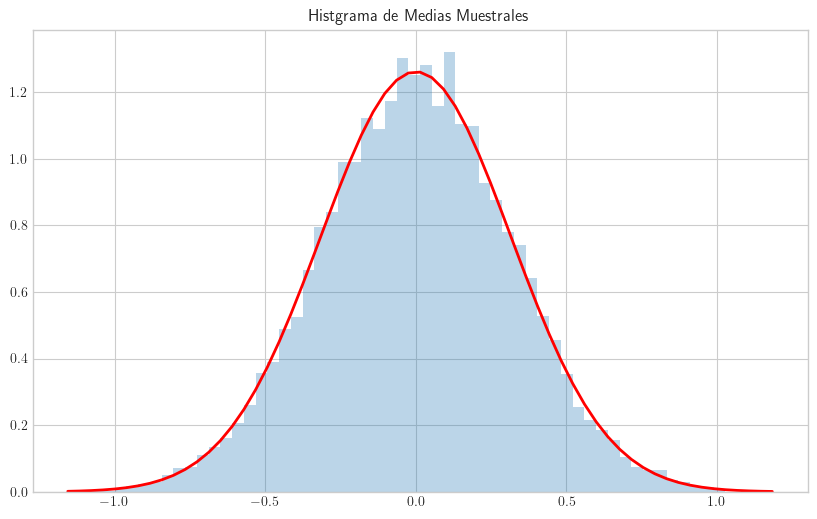

In [87]:
sigma = 1/np.sqrt(n) # desviación estándar media muestral

fig, ax = plt.subplots()

c, bins, ign = ax.hist(x=medias_muestrales,
                       alpha=0.3,
                       density=True,
                       histtype='stepfilled',
                       bins='auto')

ax.plot(bins,
        1/(sigma * np.sqrt(2 * np.pi)) * np.exp(-(bins - 0)**2/(2 * sigma**2)),
        linewidth=2, color='r')
plt.title('Histograma de Medias Muestrales')
plt.show()

La línea roja, en el gráfico, presenta lo que sería la trayectoria teórica de una variable con distribución normal estándar, superpuesta al histogram generado por el conjunto de medias muestrales; se observa que la distribución de las medias muestrales se aproxima a una normal de la forma:

$$\bar{Y} \sim \mathcal{N}(0, 0.1)$$

Siendo $n=10$ (el tamaño muestral), mientras que la desviación estándar es la correspondiente a una normal estándar, es decir $\sigma=1$

El ejercicio anterior, sería un ejemplo básico de una simulación <i>Montecarlo</i>; solo consiste en seleccionar un tamaño de muestra, en este caso $n$, un número de <i>replicas</i>; obtener las medias muestrales, para cada una de las replicas. El gráfico, es solo para visualizar y comparar la forma del histograma con la forma teoríca de una curva normal con los parámetros $\mu=0$ y $\sigma=\frac{1}{{10}}$. 

## Simulación Chi-cuadrado ($\chi^2$)

Según su definición, esta distribución de probabilidad es la suma de variables normales estándar elevadas al cuadrado.

Veamos, si un ejercicio como el anterior, puede mostrar evidencias de que esto es así. Suponemos 5 grados de libertad y un conjunto de replicas muestrales que alcance a 10000, como en el caso anterior.

In [8]:
gl = 5 # grados de libertad

replicas = 10000

In [9]:
rng = np.random.default_rng(1227)

Lo siguiente es solo para crear un contenedor, que será llenado con las replicas mediante un <i>for-loop</i>

In [42]:
muestras = np.empty(shape=(replicas, gl))

In [43]:
for i in range(replicas):
    muestras[i] = rng.normal(size=gl)**2

In [44]:
muestras.shape

(10000, 5)

Lo que se espera es que al sumar, cada una de esas replicas, resulte un conjunto e variables aleatorias <i>Chi-cuadrado</i>

In [45]:
muestras = muestras.sum(axis=1)

In [46]:
muestras.shape

(10000,)

In [26]:
from scipy import stats

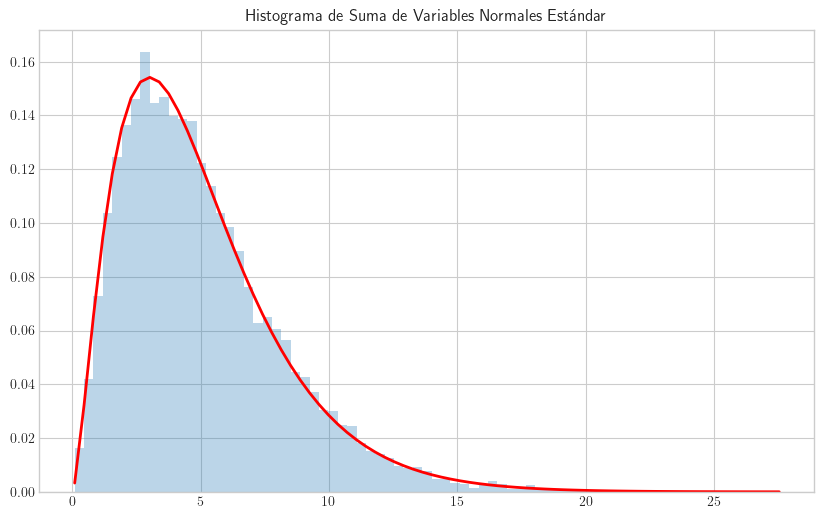

In [54]:
fig, ax = plt.subplots()

c, bins, ign = ax.hist(x=muestras,
                       alpha=0.3,
                       density=True,
                       histtype='stepfilled',
                       bins='auto')

ax.plot(bins,
        stats.chi2.pdf(bins, df=5),
        linewidth=2, color='r')
plt.title('Histograma de Suma de Variables Normales Estándar')
plt.show()

Aquí, de nuevo, la línea roja pretende mostrar la trayectoria de una variable aleatoria <i>Chi-cuadrado</i> con 5 grados de libertad; la cual se superpone a la figura del histograma generado con las sumas de las variables normales estándar.